In [288]:
import torch
import os
from torch import nn
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [237]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [238]:
df = pd.read_csv('jennatimeserieslstm/jena_climate_2009_2016.csv')

In [239]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [240]:
df = df[5::6]
df.head()


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [241]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [242]:
df.index = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [243]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [244]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [245]:
temp = df['T (degC)']

<Axes: xlabel='Date Time'>

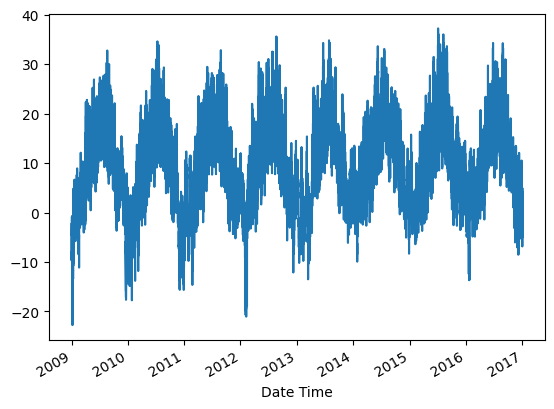

In [246]:
temp.plot()

In [247]:
def df_to_x_y(df, window_size=5):
    df_as_numpy = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_numpy) - window_size):
        row = [[a] for a in df_as_numpy[i:i+window_size]]
        X.append(row)
        label = df_as_numpy[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [248]:
WINDOW_SIZE = 5
X, y = df_to_x_y(temp, window_size=WINDOW_SIZE) 

In [249]:
X.shape, y.shape

((70086, 5, 1), (70086,))

In [250]:
X_train = X[:60000]
y_train = y[:60000]
X_val = X[60000:65000]
y_val = y[60000:65000]
X_test = X[65000:]
y_test = y[65000:]

In [251]:
X_train = torch.tensor(X_train).float()

In [252]:
type(X_train)

torch.Tensor

In [253]:
X_train

tensor([[[-8.0500],
         [-8.8800],
         [-8.8100],
         [-9.0500],
         [-9.6300]],

        [[-8.8800],
         [-8.8100],
         [-9.0500],
         [-9.6300],
         [-9.6700]],

        [[-8.8100],
         [-9.0500],
         [-9.6300],
         [-9.6700],
         [-9.1700]],

        ...,

        [[ 2.0200],
         [ 2.2700],
         [ 4.7100],
         [ 6.0700],
         [ 9.8800]],

        [[ 2.2700],
         [ 4.7100],
         [ 6.0700],
         [ 9.8800],
         [13.5300]],

        [[ 4.7100],
         [ 6.0700],
         [ 9.8800],
         [13.5300],
         [15.4300]]])

In [254]:
y_train = torch.tensor(y_train).float()

In [255]:
X_test = torch.tensor(X_test).float()
X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val).float()
y_test = torch.tensor(y_test).float()

In [256]:
type(X_train), type(X_test), type(X_val), type(y_train), type(y_test), type(y_val)

(torch.Tensor,
 torch.Tensor,
 torch.Tensor,
 torch.Tensor,
 torch.Tensor,
 torch.Tensor)

In [257]:
train = TensorDataset(X_train, y_train)
val = TensorDataset(X_val, y_val)
test = TensorDataset(X_test, y_test)

In [258]:
train

In [268]:
train_dataloader = DataLoader(train, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test, batch_size=1, shuffle=False)

In [269]:
#for batch_idx, (inp, labels) in enumerate(train_data_test):
    #print(f'for batch: {batch_idx}\ninputs: {inp}\nlabels: {labels}')

In [270]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([60000, 5, 1]),
 torch.Size([60000]),
 torch.Size([5000, 5, 1]),
 torch.Size([5000]),
 torch.Size([5086, 5, 1]),
 torch.Size([5086]))

In [271]:
for batch_idx, (data, target) in enumerate(train):
    print(data)
    print(target)
    break

tensor([[-8.0500],
        [-8.8800],
        [-8.8100],
        [-9.0500],
        [-9.6300]])
tensor(-9.6700)


In [272]:
class Forecast(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(Forecast, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.linear_1 = nn.Linear(hidden_size, 8)
        self.linear_2 = nn.Linear(8, output_size)
        self.relu= nn.ReLU()
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.relu(self.linear_1(out))
        out = self.linear_2(out)
        return out

In [273]:
model = Forecast(input_size=1, hidden_size=64, num_layers=1, output_size=1).to(device)

In [274]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

In [275]:
N_EPOCHS = 20
N_BATCH_SIZE = 64

In [279]:
#training loop
model.train()
running_loss = 0
total_loss = 0

for epoch in range(N_EPOCHS):
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch+1}', unit='batch')):
        data = data.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        
        outputs = model(data)
        loss = criterion(outputs.view(-1), target)
        
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        total_loss += loss.item()

        if batch_idx == 0:
            print(f'Epoch: {epoch}, Step: {batch_idx}, Loss: {running_loss/len(train_dataloader)}')
            running_loss = 0
    
print('Loss:', total_loss/len(train_dataloader.dataset))

Epoch 1:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 0, Step: 0, Loss: 0.00032553412119547525


Epoch 2:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 1, Step: 0, Loss: 0.6388558642330269


Epoch 3:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 2, Step: 0, Loss: 0.6371229003469149


Epoch 4:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 3, Step: 0, Loss: 0.6356790878904363


Epoch 5:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 4, Step: 0, Loss: 0.6344259238357345


Epoch 6:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 5, Step: 0, Loss: 0.6333968431246777


Epoch 7:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 6, Step: 0, Loss: 0.6325323319469889


Epoch 8:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 7, Step: 0, Loss: 0.6317357350957891


Epoch 9:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 8, Step: 0, Loss: 0.6310502247020602


Epoch 10:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 9, Step: 0, Loss: 0.6303963588838776


Epoch 11:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 10, Step: 0, Loss: 0.629824701552093


Epoch 12:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 11, Step: 0, Loss: 0.6293027121926348


Epoch 13:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 12, Step: 0, Loss: 0.628821612662822


Epoch 14:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 13, Step: 0, Loss: 0.6283615725271404


Epoch 15:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 14, Step: 0, Loss: 0.6279642277792096


Epoch 16:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 15, Step: 0, Loss: 0.6275430827123424


Epoch 17:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 16, Step: 0, Loss: 0.6271445413311323


Epoch 18:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 17, Step: 0, Loss: 0.6267539316008488


Epoch 19:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 18, Step: 0, Loss: 0.6263890610560775


Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 19, Step: 0, Loss: 0.6260389884660641
Loss: 0.3940336496896499


In [280]:
len(train_dataloader)

1875

In [281]:
total_loss/len(train_dataloader.dataset)

0.3940336496896499

In [282]:
#validation loop
model.eval()
val_loss = 0
running_val_loss = 0
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(val_dataloader, unit='batch')):
        data = data.to(device)
        target = target.to(device)
        
        outputs = model(data)
        loss = criterion(outputs.view(-1), target)
        
        val_loss += loss.item()
        running_val_loss += loss.item()

        if batch_idx == 0:
            print(f'Step: {batch_idx}, Loss: {running_val_loss/len(val_dataloader)}')
            running_val_loss = 0

print('Val Loss:', val_loss/len(val_dataloader.dataset))

  0%|          | 0/5000 [00:00<?, ?batch/s]

Step: 0, Loss: 0.000517729663848877
Val Loss: 0.5481546969670594


In [283]:
#test loop
model.eval()
pred = []
real = []
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(test_dataloader, unit='batch')):
        data = data.to(device)
        target = target.to(device)
        
        outputs = model(data)
        pred.append(outputs.item())
        real.append(target.item())

  0%|          | 0/5086 [00:00<?, ?batch/s]

In [284]:
pred

[13.9605131149292,
 12.832783699035645,
 12.458226203918457,
 12.03643798828125,
 11.608449935913086,
 11.5015230178833,
 10.806899070739746,
 11.114995956420898,
 15.435282707214355,
 19.881254196166992,
 19.89841079711914,
 21.28016471862793,
 21.54881477355957,
 20.5902156829834,
 21.55221176147461,
 23.648698806762695,
 21.494136810302734,
 20.622648239135742,
 20.20323371887207,
 18.97712516784668,
 17.846464157104492,
 17.0819091796875,
 16.85647201538086,
 15.7959566116333,
 15.80724048614502,
 15.399048805236816,
 15.236355781555176,
 15.330618858337402,
 15.356934547424316,
 15.4247407913208,
 15.213603973388672,
 15.70189380645752,
 16.47777557373047,
 17.389101028442383,
 18.65836524963379,
 18.339529037475586,
 17.848337173461914,
 18.827877044677734,
 19.612558364868164,
 18.419286727905273,
 16.154003143310547,
 15.944397926330566,
 17.113283157348633,
 16.87835693359375,
 16.556440353393555,
 16.664045333862305,
 15.98608112335205,
 14.503169059753418,
 13.84915447235107

In [285]:
real

[13.989999771118164,
 13.460000038146973,
 12.930000305175781,
 12.430000305175781,
 12.170000076293945,
 11.550000190734863,
 11.59000015258789,
 14.220000267028809,
 17.8700008392334,
 19.1200008392334,
 20.75,
 21.56999969482422,
 21.43000030517578,
 22.329999923706055,
 24.030000686645508,
 22.889999389648438,
 22.200000762939453,
 21.760000228881836,
 20.549999237060547,
 19.309999465942383,
 18.43000030517578,
 18.06999969482422,
 17.040000915527344,
 16.8700008392334,
 16.420000076293945,
 16.18000030517578,
 16.139999389648438,
 16.110000610351562,
 16.1299991607666,
 15.970000267028809,
 16.290000915527344,
 16.8700008392334,
 17.639999389648438,
 18.729999542236328,
 18.850000381469727,
 18.68000030517578,
 19.450000762939453,
 20.15999984741211,
 19.469999313354492,
 17.5,
 17.139999389648438,
 17.8799991607666,
 17.719999313354492,
 17.459999084472656,
 17.5,
 16.979999542236328,
 15.699999809265137,
 14.979999542236328,
 14.09000015258789,
 13.359999656677246,
 12.90999984

In [286]:
predictions_df = pd.DataFrame(pred, columns=['Predictions'])
real_values_df = pd.DataFrame(real, columns=['Real Values'])

results_df = pd.concat([predictions_df, real_values_df], axis=1)

print(results_df)

      Predictions  Real Values
0       13.960513        13.99
1       12.832784        13.46
2       12.458226        12.93
3       12.036438        12.43
4       11.608450        12.17
...           ...          ...
5081    -0.948286        -0.98
5082    -1.276163        -1.40
5083    -1.500624        -2.75
5084    -2.961991        -2.89
5085    -2.732267        -3.93

[5086 rows x 2 columns]


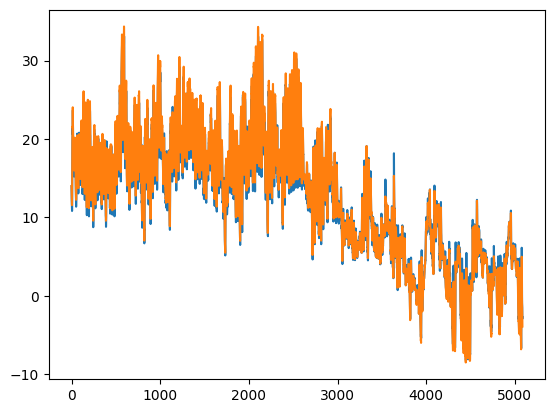

In [287]:
plt.plot(results_df['Predictions'], label='Predictions')
plt.plot(results_df['Real Values'], label='Real Values')

In [289]:
r2_score = r2_score(results_df['Real Values'], results_df['Predictions'])
print('The R2 score is:', r2_score)

The R2 score is: 0.9864820350680068
